<a href="https://colab.research.google.com/github/nfierroflo/Evolutionary-computation/blob/main/evolutivacompletoc1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
A=0.18
t0=33.941
gamma=18.975
beta=0.666
tfall=40.076
trise=13.416

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

In [3]:
import csv

#guardar
from csv import writer  #para guardar datos
def GuardarDatos(datasave,filename):
  with open(filename,'a') as file:
    writer_object=writer(file);
    writer_object.writerow(datasave);

In [4]:
def str_to_value(value,text):
    text = text.replace("|_div_|", "/")
    text = text.replace("_exp_", "np.exp")
    text = text.replace("_sig_", "sigmoid")
    text = text.replace("x[0]", "t")
    t = value
    return eval(text)

In [5]:
import sympy as sp
def simplify_expr(text):
    t = sp.Symbol('t')
    text = text.replace("|_div_|", "/")
    text = text.replace("_exp_", "exp")
    text = text.replace("_sig_", "sigmoide")
    text = text.replace("x[0]", "t")
    print(text)
    return sp.simplify(text)

In [6]:
expr="(0.544*(1-0.625*(11.33-38.8)|_div_|13.42)|_div_|(1+_exp_((36.9-x[0])|_div_|79.46)))*(1-_sig_(0.2*(x[0]-(94.03+33.1))))+0.866*(1-0.068)*_exp_((87.65+32.8-x[0])|_div_|39.03)|_div_|(1+_exp_((35.6-x[0])|_div_|03.89))*_sig_(0.2*(x[0]-(03.31+34.2)))"
simplify_expr(expr)

(0.544*(1-0.625*(11.33-38.8)/13.42)/(1+exp((36.9-t)/79.46)))*(1-sigmoide(0.2*(t-(94.03+33.1))))+0.866*(1-0.068)*exp((87.65+32.8-t)/39.03)/(1+exp((35.6-t)/03.89))*sigmoide(0.2*(t-(03.31+34.2)))


(-1.23996125186289*(sigmoide(0.2*t - 25.426) - 1)*(exp(0.25706940874036*t) + 9430.1845990482)*exp(0.0125849484017116*t) + 17.6687013708594*(exp(0.0125849484017116*t) + 1.59103475842768)*sigmoide(0.2*t - 7.502)*exp(0.231448091804669*t))/((exp(0.0125849484017116*t) + 1.59103475842768)*(exp(0.25706940874036*t) + 9430.1845990482))

## late

In [7]:
fnc1 = lambda t:(A*(1-beta)*np.exp(-(t-(gamma+t0))/tfall)/(1+np.exp(-(t-t0)/trise)))

## early

In [8]:
fnc2 = lambda t:(A*(1-beta*(t-t0)/gamma)/(1+np.exp(-(t-t0)/trise)))

## guardar Datos

In [9]:
import math

def sigmoid(x):
  
    z = np.exp(-x)
    sig = 1 / (1 + z)

    return sig

In [10]:
def plotResult(x,y,r1, r2, r3,title1=' '):
  plt.plot(x,y,label='Train signal')
  plt.plot(t,r1,label='Run 0')
  plt.plot(t,r2,label='Run 1')
  plt.plot(t,r3,label='Run 2')
  plt.legend()
  plt.title('start:'+title1)
  plt.grid()

def plotFitness(epoch,f1, f2, f3,title1=''):
  plt.plot(epoch,f1,label='Run 0')
  plt.plot(epoch,f2,label='Run 1')
  plt.plot(epoch,f3,label='Run 2')
  plt.legend()
  plt.title('Fitness :'+title1)
  plt.grid()


## cambio de conjunto de entrenamiento

In [11]:
import numpy as np
limitInner = [-20, 20]
n_train = 21
t1=np.linspace(*limitInner,n_train)

limitInner = [21, 80]
n_train = 60
t2=np.linspace(*limitInner,n_train)

limitInner = [81, 100]
n_train = 10
t3=np.linspace(*limitInner,n_train)
t=np.concatenate((t1,t2,t3))

34.0 0.0890832629765388


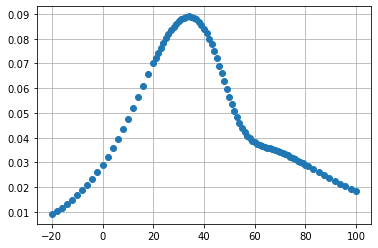

In [12]:
ylate=fnc1(t)
yearly=fnc2(t)
aux=0.2*(t-(gamma+t0))
gt=sigmoid(aux)
Totalv2=yearly*(1-gt)+ylate*gt
print(t[np.argmax(Totalv2)],Totalv2[np.argmax(Totalv2)])
plt.plot(t,Totalv2,'o')
plt.grid()

In [13]:
t

array([-20.        , -18.        , -16.        , -14.        ,
       -12.        , -10.        ,  -8.        ,  -6.        ,
        -4.        ,  -2.        ,   0.        ,   2.        ,
         4.        ,   6.        ,   8.        ,  10.        ,
        12.        ,  14.        ,  16.        ,  18.        ,
        20.        ,  21.        ,  22.        ,  23.        ,
        24.        ,  25.        ,  26.        ,  27.        ,
        28.        ,  29.        ,  30.        ,  31.        ,
        32.        ,  33.        ,  34.        ,  35.        ,
        36.        ,  37.        ,  38.        ,  39.        ,
        40.        ,  41.        ,  42.        ,  43.        ,
        44.        ,  45.        ,  46.        ,  47.        ,
        48.        ,  49.        ,  50.        ,  51.        ,
        52.        ,  53.        ,  54.        ,  55.        ,
        56.        ,  57.        ,  58.        ,  59.        ,
        60.        ,  61.        ,  62.        ,  63.  

In [14]:
for i in range(len(t)):
  c=t[i]
  data=[c,Totalv2[i]]
  GuardarDatos(data,'TrainTotalv3.txt')

## avance 4

C:\Users\nfier\AppData\Local\Temp\ipykernel_40320\917953519.py:1: RuntimeWarning: divide by zero encountered in true_divide
  g1=lambda x: 5.42+(((x)/(np.exp(-(np.exp(-(x))))))/(np.exp((np.exp(-(3.35)))*(x))))/(2.24)


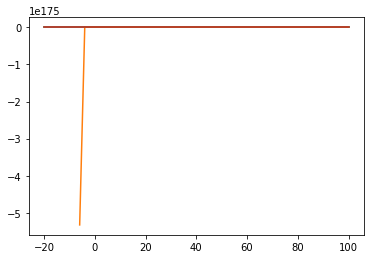

In [15]:
g1=lambda x: 5.42+(((x)/(np.exp(-(np.exp(-(x))))))/(np.exp((np.exp(-(3.35)))*(x))))/(2.24)
g0=lambda x: 2+(x)/(np.exp(np.exp((np.exp(-(4.13)))*((x)+(np.exp(-(((5.73)*(np.exp(-(8.12))))/((0.89)/(np.exp(x))))))))))
g2=lambda x: 0.93+(x)/(np.exp((np.exp(-(3.25)))*((x)+(5.34))))
plt.plot(t,Totalv2)
plt.plot(t, g1(t))
plt.plot(t, g0(t))
plt.plot(t, g2(t))

In [16]:
max(abs(Totalv2-g1(t)))

C:\Users\nfier\AppData\Local\Temp\ipykernel_40320\917953519.py:1: RuntimeWarning: divide by zero encountered in true_divide
  g1=lambda x: 5.42+(((x)/(np.exp(-(np.exp(-(x))))))/(np.exp((np.exp(-(3.35)))*(x))))/(2.24)


inf

In [17]:
g1(t)[-1]

C:\Users\nfier\AppData\Local\Temp\ipykernel_40320\917953519.py:1: RuntimeWarning: divide by zero encountered in true_divide
  g1=lambda x: 5.42+(((x)/(np.exp(-(np.exp(-(x))))))/(np.exp((np.exp(-(3.35)))*(x))))/(2.24)


6.756773547312543

In [18]:
abs(Totalv2[-1]-g1(t)[-1])

C:\Users\nfier\AppData\Local\Temp\ipykernel_40320\917953519.py:1: RuntimeWarning: divide by zero encountered in true_divide
  g1=lambda x: 5.42+(((x)/(np.exp(-(np.exp(-(x))))))/(np.exp((np.exp(-(3.35)))*(x))))/(2.24)


6.738359593823373

## preubas avance 3

C:\Users\nfier\AppData\Local\Temp\ipykernel_40320\2676809861.py:4: RuntimeWarning: overflow encountered in exp
  g0=lambda x: 1.37+((2.28)/((5.05)+(x)))+((x)/((3.17)+(((np.exp(((x)-((np.exp(-(np.exp(np.exp(-((2.99)+((x)*(8.47))))))))/((np.exp(1.43))/(2.37))))/(5.41)))*(7.70))/(np.exp(8.51)))))
C:\Users\nfier\AppData\Local\Temp\ipykernel_40320\2676809861.py:3: RuntimeWarning: divide by zero encountered in true_divide
  g1=lambda x: 1.98+((x)/((np.exp(1.18))+((np.exp((x)/(8.41)))/(x))))+((0.44)/((9.27)*(x)))
C:\Users\nfier\AppData\Local\Temp\ipykernel_40320\2676809861.py:5: RuntimeWarning: divide by zero encountered in true_divide
  g2=lambda x:  1.71+((0.70)/(x))+((x)/(np.exp(np.exp((x)*(np.exp(-(4.09)))))))


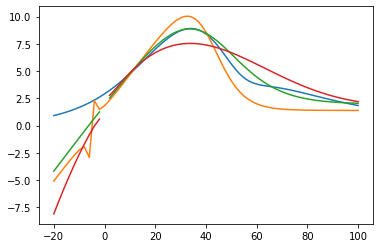

In [19]:
x=t
y=100*Totalv2
g1=lambda x: 1.98+((x)/((np.exp(1.18))+((np.exp((x)/(8.41)))/(x))))+((0.44)/((9.27)*(x)))
g0=lambda x: 1.37+((2.28)/((5.05)+(x)))+((x)/((3.17)+(((np.exp(((x)-((np.exp(-(np.exp(np.exp(-((2.99)+((x)*(8.47))))))))/((np.exp(1.43))/(2.37))))/(5.41)))*(7.70))/(np.exp(8.51)))))
g2=lambda x:  1.71+((0.70)/(x))+((x)/(np.exp(np.exp((x)*(np.exp(-(4.09)))))))
plt.plot(x,y)
plt.plot(t, g0(t))
plt.plot(t, g1(t))
plt.plot(t, g2(t))

In [20]:
[[[7, 61, 3, 28, 5, 44, 5, 50, 5, 37, 5, 51, 1, 42, 3], [[1], [0, 1], [1, 0, 0], [1, 1, 0, 1], [0, 1, 1, 0, 1], [1, 0, 1, 0, 0, 0], [1, 0, 1, 0, 1, 0, 1], [1, 1, 0, 0, 1, 1, 1, 1]]], [[7, 25, 3, 43, 3, 50, 3, 62, 5, 40, 5, 17, 5, 61, 1], [[1], [1, 1], [0, 0, 1], [1, 1, 0, 1], [1, 0, 1, 0, 1], [0, 1, 1, 1, 0, 1], [1, 1, 0, 1, 0, 1, 0], [0, 0, 0, 1, 1, 1, 1, 1]]], [2, 0], [[2, 52, 3, 43, 5], [[1], [1, 0], [1, 1, 1]]], [[5, 41, 1, 25, 5, 63, 3, 35, 3, 46, 5], [[1], [0, 1], [1, 1, 0], [0, 1, 1, 0], [0, 1, 0, 0, 1], [1, 0, 1, 1, 1, 1]]], [2, 0], [2, 0], [[6, 42, 3, 44, 1, 19, 1, 17, 3, 57, 3, 26, 5], [[1], [0, 1], [1, 1, 0], [1, 0, 1, 1], [1, 0, 0, 0, 0], [1, 0, 0, 1, 1, 0], [1, 1, 1, 1, 1, 1, 1]]], [[4, 19, 5, 29, 3, 17, 1, 43, 3], [[1], [1, 1], [0, 1, 1], [1, 0, 0, 0], [0, 0, 0, 1, 1]]]]

[[[7, 61, 3, 28, 5, 44, 5, 50, 5, 37, 5, 51, 1, 42, 3],
  [[1],
   [0, 1],
   [1, 0, 0],
   [1, 1, 0, 1],
   [0, 1, 1, 0, 1],
   [1, 0, 1, 0, 0, 0],
   [1, 0, 1, 0, 1, 0, 1],
   [1, 1, 0, 0, 1, 1, 1, 1]]],
 [[7, 25, 3, 43, 3, 50, 3, 62, 5, 40, 5, 17, 5, 61, 1],
  [[1],
   [1, 1],
   [0, 0, 1],
   [1, 1, 0, 1],
   [1, 0, 1, 0, 1],
   [0, 1, 1, 1, 0, 1],
   [1, 1, 0, 1, 0, 1, 0],
   [0, 0, 0, 1, 1, 1, 1, 1]]],
 [2, 0],
 [[2, 52, 3, 43, 5], [[1], [1, 0], [1, 1, 1]]],
 [[5, 41, 1, 25, 5, 63, 3, 35, 3, 46, 5],
  [[1], [0, 1], [1, 1, 0], [0, 1, 1, 0], [0, 1, 0, 0, 1], [1, 0, 1, 1, 1, 1]]],
 [2, 0],
 [2, 0],
 [[6, 42, 3, 44, 1, 19, 1, 17, 3, 57, 3, 26, 5],
  [[1],
   [0, 1],
   [1, 1, 0],
   [1, 0, 1, 1],
   [1, 0, 0, 0, 0],
   [1, 0, 0, 1, 1, 0],
   [1, 1, 1, 1, 1, 1, 1]]],
 [[4, 19, 5, 29, 3, 17, 1, 43, 3],
  [[1], [1, 1], [0, 1, 1], [1, 0, 0, 0], [0, 0, 0, 1, 1]]]]

C:\Users\nfier\AppData\Local\Temp\ipykernel_40320\2676809861.py:3: RuntimeWarning: divide by zero encountered in true_divide
  g1=lambda x: 1.98+((x)/((np.exp(1.18))+((np.exp((x)/(8.41)))/(x))))+((0.44)/((9.27)*(x)))


Text(0.5, 1.0, 'Start: num + exp +exp')

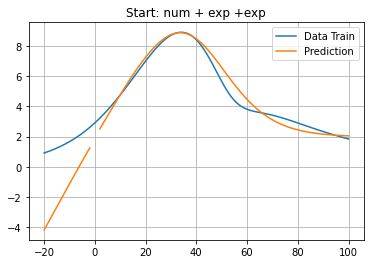

In [21]:
plt.plot(x,y,label='Data Train');
#plt.plot(t, g0(t))
plt.plot(t, g1(t),label='Prediction');
#plt.plot(t, g2(t))
plt.grid();

plt.legend();
plt.title('Start: num + exp +exp' )

## COn distacia d en fitness

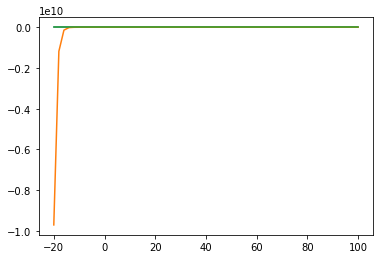

In [22]:
g0=lambda x: 0.85+(0.43)+(np.exp(-((np.exp(-(((x)/(6.06))/(np.exp(1.69)))))/((np.exp(-(6.84)))-((7.77)/((4.25)+(x)))))))
g1=lambda x: 3.82+((((np.exp(x))+(x))-(np.exp(x)))/(np.exp(2.03)))+(np.exp(-(((np.exp(3.15))/(np.exp(-(x))))+(1.67))))
g2=lambda x: 0.01+(np.exp(-(9.03)))+((8.90)/(np.exp((np.exp(-(x)))/(x))))
g3=lambda x: 3.83+((1.50)-(np.exp(np.exp(-(x)))))+(np.exp(-((0.34)+(np.exp(-((np.exp(-(x)))*(np.exp(np.exp(4.36)))))))))
g4=lambda x: 2.43+((x)/(np.exp(np.exp((x)*(np.exp(-(3.99)))))))+((x)/(np.exp(x)))
g5=lambda x: 3.55+(((np.exp(x))+((x)-(np.exp(x))))/(6.35))+((np.exp(-(5.97)))/((x)-(0.71)))
g6=lambda x: 2.89+((x)/(np.exp((7.77)*(8.80))))+((x)/(np.exp(np.exp((7.53)*(((x)-(((x)-(x))-(3.43)))*(np.exp(-(6.13))))))))
#3.28+((0.09)/(7.73))+((x)/((np.exp(x))-((np.exp(x))-(7.26))))

plt.plot(x,y)
#plt.plot(x, g0(t))
#plt.plot(x, g1(t))
#plt.plot(x, g2(t))
#plt.plot(x, g3(t))
plt.plot(t, g4(t))
#plt.plot(t, g5(t))
plt.plot(t, g6(t))

## Ne RMS

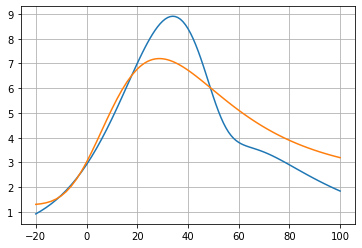

In [23]:
plt.plot(x,y)
plt.plot(t, g0(t) )
plt.grid()

C:\Users\nfier\AppData\Local\Temp\ipykernel_40320\711834072.py:1: RuntimeWarning: divide by zero encountered in true_divide
  g0=lambda x: 0.03+((x)/(np.exp((np.exp(-(0.90)))+(((x)*(0.04))-(0.25)))))+((1.91)/((x)+(x)))


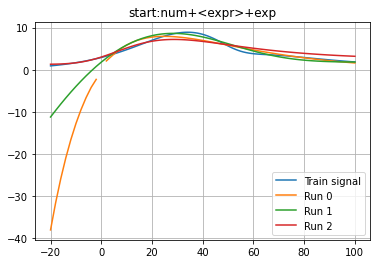

In [24]:
g0=lambda x: 0.03+((x)/(np.exp((np.exp(-(0.90)))+(((x)*(0.04))-(0.25)))))+((1.91)/((x)+(x)))
g1=lambda x: 2.80+((np.exp(-(np.exp(-(((3.51)-((x)/(4.04)))/(9.96))))))*(x))+((np.exp(-(8.53)))-(np.exp(-(np.exp(-(8.30))))))
g2=lambda x: 0.85+(0.43)+(np.exp(-((np.exp(-(((x)/(6.06))/(np.exp(1.69)))))/((np.exp(-(6.84)))-((7.77)/((4.25)+(x)))))))
g3=lambda x: 2.37+(x)+(((2.72)-(x))*((1.07)-((3.74)/(x))))
plotResult(x,y,g0(t),g1(t), g2(t),'num+<expr>+exp')

## New genotype con value+exp+exp

C:\Users\nfier\AppData\Local\Temp\ipykernel_40320\1441908393.py:1: RuntimeWarning: divide by zero encountered in true_divide
  g0=lambda x:1.42+((np.exp(-(np.exp(-(((3.95)-(x))/((np.exp(3.97))+(np.exp((1.57)/(x)))))))))*(x))+(np.exp(-((x)+((9.71)/(x)))))
C:\Users\nfier\AppData\Local\Temp\ipykernel_40320\1441908393.py:4: RuntimeWarning: divide by zero encountered in true_divide
  g3=lambda x: 2.37+(x)+(((2.72)-(x))*((1.07)-((3.74)/(x))))


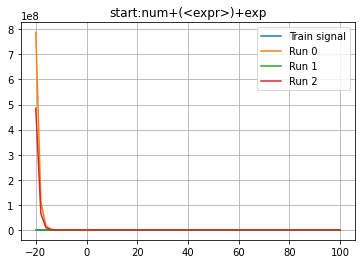

In [25]:
g0=lambda x:1.42+((np.exp(-(np.exp(-(((3.95)-(x))/((np.exp(3.97))+(np.exp((1.57)/(x)))))))))*(x))+(np.exp(-((x)+((9.71)/(x)))))
g1=lambda x: 1.57+(1.69)+(np.exp(-((np.exp(-((np.exp(4.03))-(x))))-((1.16)+((((x)/(8.99))+((3.27)*(x)))/(np.exp(6.64)))))))
g2=lambda x: 2.25+((np.exp(-(np.exp((x)/(np.exp(3.96))))))*(x))+(np.exp(-(x)))
g3=lambda x: 2.37+(x)+(((2.72)-(x))*((1.07)-((3.74)/(x))))
plotResult(x,y,g0(t),g3(t), g2(t),'num+(<expr>)+exp')

# se modifio el genotipo para tene =r num+exp

C:\Users\nfier\AppData\Local\Temp\ipykernel_40320\211855467.py:1: RuntimeWarning: divide by zero encountered in true_divide
  g0=lambda x: 7.03+(((5.69)-(x))*(np.exp(-((2.05)+(((3.84)/(x))/(np.exp(-(2.85))))))))


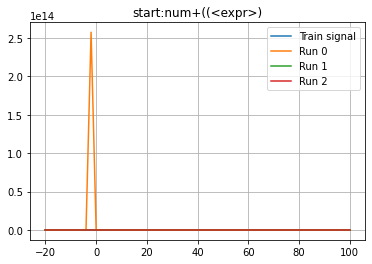

In [26]:
g0=lambda x: 7.03+(((5.69)-(x))*(np.exp(-((2.05)+(((3.84)/(x))/(np.exp(-(2.85))))))))
g1=lambda x: 3.81+(np.exp(-(((np.exp(-(np.exp(3.77))))*(np.exp(x)))+(((0.62)-((x)/((2.47)-(1.53))))+(x)))))
g2=lambda x: 0.22+((x)/(np.exp((np.exp(-(3.23)))*((x)+(4.83)))))
plotResult(x,y,g0(t),g1(t), g2(t),'num+((<expr>)')

## Datos iniciales con todo

C:\Users\nfier\AppData\Local\Temp\ipykernel_40320\1873992750.py:1: RuntimeWarning: overflow encountered in exp
  g0=lambda x: (x)/((np.exp(((x)/(7.01))/(3.45)))+(np.exp(-(np.exp(np.exp(-(((x)/(1.10))*(np.exp(np.exp(-(9.94)))))))))))
C:\Users\nfier\AppData\Local\Temp\ipykernel_40320\1873992750.py:2: RuntimeWarning: divide by zero encountered in true_divide
  g1=lambda x: (x)/(np.exp(((x)/(5.76))/((4.26)-((9.91)/(x)))))
C:\Users\nfier\AppData\Local\Temp\ipykernel_40320\1873992750.py:3: RuntimeWarning: divide by zero encountered in true_divide
  g2=lambda x: (x)/(np.exp((x)/(np.exp((3.18)-(np.exp(-((x)/((2.28)+(6.57)))))))))


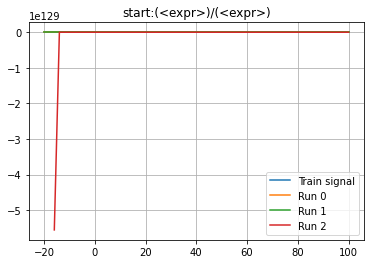

In [27]:
g0=lambda x: (x)/((np.exp(((x)/(7.01))/(3.45)))+(np.exp(-(np.exp(np.exp(-(((x)/(1.10))*(np.exp(np.exp(-(9.94)))))))))))
g1=lambda x: (x)/(np.exp(((x)/(5.76))/((4.26)-((9.91)/(x)))))
g2=lambda x: (x)/(np.exp((x)/(np.exp((3.18)-(np.exp(-((x)/((2.28)+(6.57)))))))))

plotResult(x,y,g0(t),g1(t), g2(t),'(<expr>)/(<expr>)')

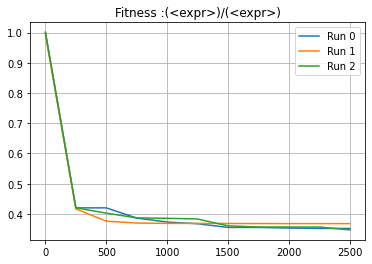

In [28]:
epoch=[0,250,500,750,1000,1250,1500,1750,2000,2250,2500]
fit0=[1.001, 0.42, 0.4199, 0.3862, 0.3730,  0.3674, 0.3552, 0.3552, 0.3532, 0.3519 ,0.3519]
fit1=[0.9931, 0.4163, 0.3761,  0.3698, 0.3686, 0.3686,0.3682, 0.3681, 0.3679,0.3679,0.3679  ]
fit2=[0.9997, 0.4201, 0.4025, 0.3868, 0.3854, 0.3831, 0.3605, 0.3566, 0.3566,0.3566, 0.347 ] 
plotFitness(epoch, fit0, fit1, fit2,'(<expr>)/(<expr>)')

C:\Users\nfier\AppData\Local\Temp\ipykernel_40320\1873992750.py:2: RuntimeWarning: divide by zero encountered in true_divide
  g1=lambda x: (x)/(np.exp(((x)/(5.76))/((4.26)-((9.91)/(x)))))


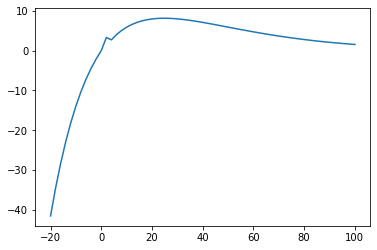

In [29]:
plt.plot(x,g1(t),label='Run 1')

In [30]:
(t*np.exp(-(t/36.21)))/np.exp(-(57.33))+(19.22/np.exp(-(np.exp(-(54.28/np.exp(-((t/np.exp(-(t))))))))))
(t*np.exp(-(t/36.21)))/np.exp(-(57.33))+(19.22/np.exp(-(np.exp(-(54.28/np.exp(-((x/np.exp(-(x))))))))))

C:\Users\nfier\AppData\Local\Temp\ipykernel_40320\20460493.py:1: RuntimeWarning: divide by zero encountered in true_divide
  (t*np.exp(-(t/36.21)))/np.exp(-(57.33))+(19.22/np.exp(-(np.exp(-(54.28/np.exp(-((t/np.exp(-(t))))))))))
C:\Users\nfier\AppData\Local\Temp\ipykernel_40320\20460493.py:2: RuntimeWarning: divide by zero encountered in true_divide
  (t*np.exp(-(t/36.21)))/np.exp(-(57.33))+(19.22/np.exp(-(np.exp(-(54.28/np.exp(-((x/np.exp(-(x))))))))))


array([-2.74794529e+26, -2.34025428e+26, -1.96844362e+26, -1.62983444e+26,
       -1.32193213e+26, -1.04241432e+26, -7.89119563e+25, -5.60036754e+25,
       -3.53295192e+25, -1.67155314e+25,  1.92200000e+01,  1.49673564e+25,
        2.83261500e+25,  4.02060368e+25,  5.07273831e+25,  6.00018897e+25,
        6.81331754e+25,  7.52173236e+25,  8.13433921e+25,  8.65938916e+25,
        9.10452315e+25,  9.29935295e+25,  9.47681376e+25,  9.63770722e+25,
        9.78280423e+25,  9.91284596e+25,  1.00285449e+26,  1.01305860e+26,
        1.02196275e+26,  1.02963017e+26,  1.03612164e+26,  1.04149553e+26,
        1.04580791e+26,  1.04911263e+26,  1.05146136e+26,  1.05290375e+26,
        1.05348743e+26,  1.05325811e+26,  1.05225963e+26,  1.05053409e+26,
        1.04812182e+26,  1.04506151e+26,  1.04139027e+26,  1.03714364e+26,
        1.03235570e+26,  1.02705907e+26,  1.02128504e+26,  1.01506353e+26,
        1.00842321e+26,  1.00139150e+26,  9.93994668e+25,  9.86257809e+25,
        9.78204937e+25,  

In [33]:
g0=lambda t: (t*np.exp(-(t/36.21)))/np.exp(-(57.33))+(19.22/np.exp(-(np.exp(-(54.28/np.exp(-((t/np.exp(-(t))))))))))
g1=lambda t: (t*np.exp(-(t/36.21)))/np.exp(-(57.33))+(19.22/np.exp(-(np.exp(-(54.28/np.exp(-((t/np.exp(-(t))))))))))
g2=lambda t: np.exp(-(np.exp(-((t/07.43)))))/((21.88+np.exp(-(np.exp(-(np.exp(-(t))))-t/37.37)))
            -np.exp(-(np.exp(-((np.exp(-(np.exp(-((np.exp(-(((t*46.67*t)/t)))/89.61)))))*t)/np.exp(-(61.88)))))))

C:\Users\nfier\AppData\Local\Temp\ipykernel_40320\2422014079.py:1: RuntimeWarning: divide by zero encountered in true_divide
  g0=lambda t: (t*np.exp(-(t/36.21)))/np.exp(-(57.33))+(19.22/np.exp(-(np.exp(-(54.28/np.exp(-((t/np.exp(-(t))))))))))
C:\Users\nfier\AppData\Local\Temp\ipykernel_40320\2422014079.py:2: RuntimeWarning: divide by zero encountered in true_divide
  g1=lambda t: (t*np.exp(-(t/36.21)))/np.exp(-(57.33))+(19.22/np.exp(-(np.exp(-(54.28/np.exp(-((t/np.exp(-(t))))))))))


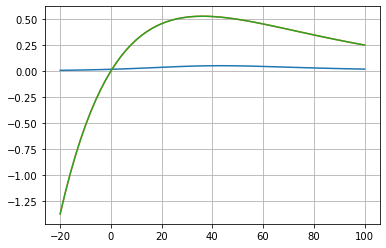

In [34]:
plt.plot(t,fnc1(t))
plt.plot(t,g0(t)/(2e26))
plt.plot(t,g1(t)/(2e26))

plt.grid()

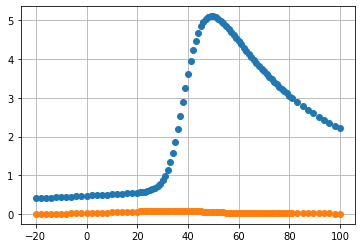

In [35]:
expr="(0.544*(1-0.625*(11.33-38.8)|_div_|13.42)|_div_|(1+_exp_((36.9-x[0])|_div_|79.46)))*(1-_sig_(0.2*(x[0]-(94.03+33.1))))+0.866*(1-0.068)*_exp_((87.65+32.8-x[0])|_div_|39.03)|_div_|(1+_exp_((35.6-x[0])|_div_|03.89))*_sig_(0.2*(x[0]-(03.31+34.2)))"
gtest=lambda t: str_to_value(t,expr)
plt.plot(t,gtest(t),'o')
plt.plot(t,Totalv2,'o')
plt.grid()

In [36]:
simplify_expr(expr)

(0.544*(1-0.625*(11.33-38.8)/13.42)/(1+exp((36.9-t)/79.46)))*(1-sigmoide(0.2*(t-(94.03+33.1))))+0.866*(1-0.068)*exp((87.65+32.8-t)/39.03)/(1+exp((35.6-t)/03.89))*sigmoide(0.2*(t-(03.31+34.2)))


(-1.23996125186289*(sigmoide(0.2*t - 25.426) - 1)*(exp(0.25706940874036*t) + 9430.1845990482)*exp(0.0125849484017116*t) + 17.6687013708594*(exp(0.0125849484017116*t) + 1.59103475842768)*sigmoide(0.2*t - 7.502)*exp(0.231448091804669*t))/((exp(0.0125849484017116*t) + 1.59103475842768)*(exp(0.25706940874036*t) + 9430.1845990482))

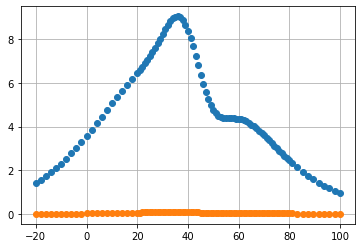

In [37]:
expr="0.979*((1-0.656*(x[0]-38.7)|_div_|00.57)*(1-_sig_(0.2*(x[0]-(11.23+37.1))))+(1-0.357)*_exp_((78.35+30.2-x[0])|_div_|19.95)*_sig_(0.2*(x[0]-(02.13+32.4))))|_div_|(1+_exp_((34.9-x[0])|_div_|14.28))"
gtest=lambda t: str_to_value(t,expr)
plt.plot(t,gtest(t),'o')
plt.plot(t,Totalv2,'o')
plt.grid()

In [38]:
simplify_expr(expr)

0.979*((1-0.656*(t-38.7)/00.57)*(1-sigmoide(0.2*(t-(11.23+37.1))))+(1-0.357)*exp((78.35+30.2-t)/19.95)*sigmoide(0.2*(t-(02.13+32.4))))/(1+exp((34.9-t)/14.28))


(0.979*(1.15087719298246*t - 45.5389473684211)*(sigmoide(0.2*t - 9.666) - 1)*exp(0.050125313283208*t) + 145.222720249339*sigmoide(0.2*t - 6.906))*exp(0.0199026979212738*t)/(exp(0.0700280112044818*t) + 11.5187666860782)

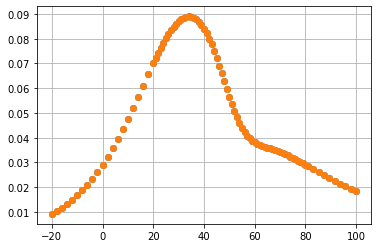

In [40]:
expr="0.18*((1-0.666*(x[0]-33.941)|_div_|18.975)*(1-_sig_(0.2*(x[0]-(18.975+33.941))))+(1-0.666)*_exp_((18.975+33.941-x[0])|_div_|40.076)*_sig_(0.2*(x[0]-(18.975+33.941))))|_div_|(1+_exp_((33.941-x[0])|_div_|13.416))"
gtest=lambda t: str_to_value(t,expr)
plt.plot(t,gtest(t),'o')
plt.plot(t,Totalv2,'o')
plt.grid()

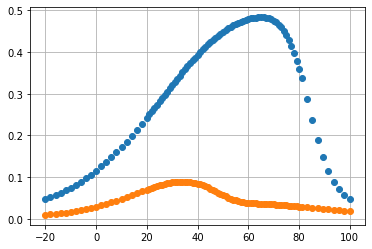

In [41]:
expr="0.701*((1-0.024*(x[0]-33.941)|_div_|04.19)*(1-_sig_(0.2*(x[0]-(49.95+33.941))))+(1-0.966)*_exp_((92.42+33.941-x[0])|_div_|79.29)*_sig_(0.2*(x[0]-(38.18+33.941))))|_div_|(1+_exp_((33.941-x[0])|_div_|18.51))"
gtest=lambda t: str_to_value(t,expr)
plt.plot(t,gtest(t),'o')
plt.plot(t,Totalv2,'o')
plt.grid()

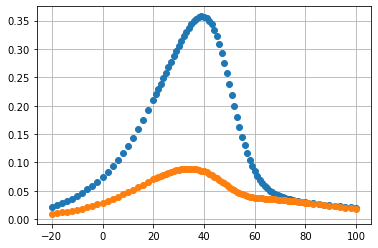

In [42]:
expr="0.704*((1-0.023*(x[0]-33.941)|_div_|03.83)*(1-_sig_(0.2*(x[0]-(15.39+33.941))))+(1-0.982)*_exp_((91.51+33.941-x[0])|_div_|53.06)*_sig_(0.2*(x[0]-(18.61+33.941))))|_div_|(1+_exp_((33.941-x[0])|_div_|14.50))"
gtest=lambda t: str_to_value(t,expr)
plt.plot(t,gtest(t),'o')
plt.plot(t,Totalv2,'o')
plt.grid()

In [43]:
simplify_expr(expr)

0.704*((1-0.023*(t-33.941)/03.83)*(1-sigmoide(0.2*(t-(15.39+33.941))))+(1-0.982)*exp((91.51+33.941-t)/53.06)*sigmoide(0.2*(t-(18.61+33.941))))/(1+exp((33.941-t)/14.50))


(0.704*(0.00600522193211488*t - 1.20382323759791)*(sigmoide(0.2*t - 9.8662) - 1)*exp(0.0188465887674331*t) + 0.134790031107533*sigmoide(0.2*t - 10.5102))*exp(0.0501189284739462*t)/(exp(0.0689655172413793*t) + 10.3891149715567)

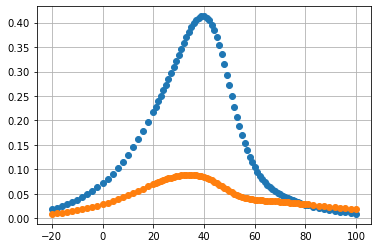

In [44]:
expr="0.666*((1-0.204*(x[0]-33.941)|_div_|10.28)*(1-_sig_(0.2*(x[0]-(15.58+33.941))))+(1-0.710)*_exp_((10.23+33.941-x[0])|_div_|18.79)*_sig_(0.2*(x[0]-(02.75+33.941))))|_div_|(1+_exp_((33.941-x[0])|_div_|12.68))"
gtest=lambda t: str_to_value(t,expr)
plt.plot(t,gtest(t),'o')
plt.plot(t,Totalv2,'o')
plt.grid()

In [45]:
simplify_expr(expr)

0.666*((1-0.204*(t-33.941)/10.28)*(1-sigmoide(0.2*(t-(15.58+33.941))))+(1-0.710)*exp((10.23+33.941-t)/18.79)*sigmoide(0.2*(t-(02.75+33.941))))/(1+exp((33.941-t)/12.68))


(0.666*(0.0198443579766537*t - 1.6735373540856)*(sigmoide(0.2*t - 9.9042) - 1)*exp(0.0532197977647685*t) + 2.02674634726989*sigmoide(0.2*t - 7.3382))*exp(0.0256445555475343*t)/(exp(0.0788643533123028*t) + 14.5375508512185)

Constantes libres, loss: RRMSE+max, gramática con constantes libres:
* POPSIZE: 2000
* GENERATIONS: 1000
* ELITISM: 500           # number of individuals that survive
* PROB_CROSSOVER: 0.9
* PROB_MUTATION: 0.3
* TSIZE: 5
* GRAMMAR: 'grammars/explicitSPM_modified.pybnf'
* EXPERIMENT_NAME: 'Results/Total/NewFitPos/Data_100Gen3'
* RUN: 1
* INCLUDE_GENOTYPE: True
* SAVE_STEP: 25
* VERBOSE: True
* MIN_TREE_DEPTH: 3
* MAX_TREE_DEPTH: 20

In [ ]:
#core
<start> ::=<sne>
<sne>   ::=<A>*(<early>*(1-<sigmoid>)+<late>*<sigmoid>)<div>(<expo1>)

<early> ::=(1-<beta>*(<t>-<t0>)<div><gamma>)
<late>  ::=(1-<beta>)*<expo2>

#exponenciale
<expo> ::= _exp_
<expo1>  ::= 1+<expo>((<t0>-<t>)<div><trise>)
<expo2> ::= <expo>((<gamma>+<t0>-<t>)<div><tfall>)
#<op> ::= +|-|*|\eb_div_\eb
<div> ::= \eb_div_\eb

#sigmoide
<sigmoid> ::= _sig_(0.2*(<t>-(<gamma>+<t0>)))

#variables y constantes
<var> ::= x[0]|x[0]|x[0]|<const_libre>
<t> ::= x[0]
<gamma>::=<const_libre>
<tfall>::=<const_libre>
<trise>::=<const_libre>
<const_libre> ::= <n><n>.<n><n>

<A> ::= <constAB> 
<beta> ::= <constAB> 
<constAB> ::= 0.<n><n><n>

#t0 acotado
<t0> ::= 33.941
#<t0> ::= <r><n>.<n>
<r> ::= 3

#cifras
<n> ::= 0|1|2|3|4|5|6|7|8|9

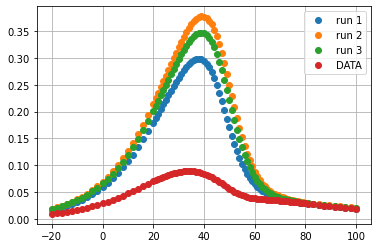

In [51]:
run1="0.601*((1-0.041*(x[0]-33.941)|_div_|03.51)*(1-_sig_(0.2*(x[0]-(12.94+33.941))))+(1-0.915)*_exp_((21.74+33.941-x[0])|_div_|44.34)*_sig_(0.2*(x[0]-(06.54+33.941))))|_div_|(1+_exp_((33.941-x[0])|_div_|13.16))"
run2="0.740*((1-0.033*(x[0]-33.941)|_div_|04.03)*(1-_sig_(0.2*(x[0]-(15.12+33.941))))+(1-0.954)*_exp_((40.33+33.941-x[0])|_div_|51.48)*_sig_(0.2*(x[0]-(13.37+33.941))))|_div_|(1+_exp_((33.941-x[0])|_div_|13.37))"
run3="0.686*((1-0.035*(x[0]-33.941)|_div_|03.83)*(1-_sig_(0.2*(x[0]-(14.55+33.941))))+(1-0.930)*_exp_((21.28+33.941-x[0])|_div_|51.75)*_sig_(0.2*(x[0]-(10.66+33.941))))|_div_|(1+_exp_((33.941-x[0])|_div_|13.39))"

g1=lambda t: str_to_value(t,run1)
g2=lambda t: str_to_value(t,run2)
g3=lambda t: str_to_value(t,run3)

plt.plot(t,g1(t),'o',label='run 1')
plt.plot(t,g2(t),'o',label='run 2')
plt.plot(t,g3(t),'o',label='run 3')
plt.plot(t,Totalv2,'o',label='DATA')
plt.legend()
plt.grid()

## datos late

## datos erly

## generar archivos